In [1]:
!rm ../data/dataset.csv
!cat ../data/en/hasoc2019/hasoc2019.csv >> ../data/dataset.csv
!cat ../data/en/hate_speech_icwsm18/nhsm.csv >> ../data/dataset.csv
!cat ../data/en/hate-speech-and-offensive-language/t_davidson.csv >> ../data/dataset.csv
!cat ../data/en/ousidhoum-etal-multilingual-hate-speech-2019/ousidhoum.csv >> ../data/dataset.csv
!cat ../data/en/semeval2019/semeval2019.csv >> ../data/dataset.csv

!rm ../data/dataset-hi.csv
!rm ../data/dataset-hi-cdmx.csv
!cat ../data/hi/hasoc2019/hi-hasoc2019.csv >> ../data/dataset-hi.csv
!cat ../data/hi/Hinglish-Offensive-Text-Classification/hi-code-mixed-pmathur.csv >> ../data/dataset-hi-cdmx.csv

In [2]:
# !pip install matplotlib
# !pip install ekphrasis
# !pip install seaborn

In [1]:
import matplotlib.pyplot as plt
import re
import pandas as pd
import feature_generation as fg

Emoji File not found..
Downloading
done!
Reading Slangs ...
Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


## English Dataset

In [2]:
df_en = pd.read_csv('../data/dataset.csv')
print(df_en.shape)
df_en.drop(df_en[(df_en['text_id'] == 'text_id')].index,inplace=True)
df_en.drop(df_en[(df_en['hate'] == 'HS')].index,inplace=True)
df_en.rename(columns={'hate':'class'},inplace=True)
print(df_en.describe())

(50386, 3)
             text_id                                               text  class
count          50381                                              50381  50381
unique         49524                                              50000      3
top     hasoc_en_867  By wearing the #BalidaanBadge over his gloves ...      2
freq               2                                                  5  22898


Size of dataset: 50381
Hateful (class) = 1: 10738 ( 21.313590440840795 %)
Offensive (class) = 2: 22898 ( 45.44967348802128 %)

****

**Hateful examples (class) = 1
["A gangster sets out to fulfill his father’s dream of becoming a doctor.    Doctor's in #WestBengal be like #munna_bhai_MBBS    #DoctorsFightBack #DoctorsStrike #DoctorsUnderOppression   @MamataOfficial https://t.co/lZQcStQ2Md", 'That’s not white supremacy though is it. That means whites thinking AND ACTING as though they are superior to others. What these Jew/Muslim joint actions are concerned with is protecting stuff like Halal/Kosher, circumcision and the right to wear religious garb. 1/2', 'Sit his ass down!  Tape his fingers and duct-tape his mouth.  Then throw him in a cage with the immigrants.  Problem solved!  Such a vision.  America, Free of Trump.  Darn, I just woke up.  Dems will do nothing.  #FuckTrump #FuckGOP #FuckCivility #ImpeachmentInquiryNow https://t.co/gU8oBArfo8', 'Congress abusive language towards PM M

<AxesSubplot:xlabel='class'>

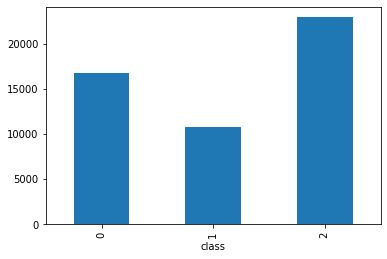

In [3]:
total = df_en.shape[0]
gp = df_en.groupby(['class'])['text_id'].count()
hate = gp[1]
offensive = gp[2]
print("Size of dataset:", total)
print("Hateful (class) = 1:", hate, "(",hate/total*100,"%)")
print("Offensive (class) = 2:",offensive, "(",offensive/total*100,"%)")
print("\n****\n")
print('**Hateful examples (class) = 1')
print(list(df_en[df_en['class']=="1"]['text'][0:10]))

print('\n**Offensive examples (class) = 2')
print(list(df_en[df_en['class']=="2"]['text'][0:10]))
gp.plot(kind='bar')


### Pre process text

In [4]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons
from ekphrasis.dicts.noslang.slang import slang

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
        'time', 'url', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated",
        'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons,slang]
)


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


In [5]:
pre = fg.features()
df_en['ekphrasis_clean_text'] = df_en.apply(lambda x: " ".join(text_processor.pre_process_doc(x.text)),axis=1)
df_en['basic_clean_text'] = df_en.apply(lambda x: pre.preprocess(x.text), axis = 1)
df_en.to_csv('../data/dataset_en.csv',index=False)

In [6]:
print(df_en['text'][100])
print(df_en['ekphrasis_clean_text'][100])

Why the #DoctorsFightBack is not just about violence unleashed on them ? Its time to address faltering justice systems, crippled health systems and broken dreams  https://t.co/S2akvvDDlY
why the <hashtag> doctors fight back </hashtag> is not just about violence unleashed on them ? its time to address faltering justice systems , crippled health systems and broken dreams <url>


In [7]:
print(df_en['text'][100])
print(df_en['basic_clean_text'][100])

Why the #DoctorsFightBack is not just about violence unleashed on them ? Its time to address faltering justice systems, crippled health systems and broken dreams  https://t.co/S2akvvDDlY
why the doctors fight back not just about violence unleashed them ? its time address faltering justice systems , crippled health systems and broken dreams


## Hindi and Code mixed Hindi Dataset

In [69]:
df_hi = pd.read_csv('../data/dataset-hi.csv')
print(df_hi.shape)
df_hi.drop(df_hi[(df_hi['text_id'] == 'text_id')].index,inplace=True)
df_hi.drop(df_hi[(df_hi['hate'] == 'HS')].index,inplace=True)
df_hi.rename(columns={'hate':'class'},inplace=True)
print(df_hi.describe())

(9330, 3)
            class
count  9330.00000
mean      0.52926
std       0.49917
min       0.00000
25%       0.00000
50%       1.00000
75%       1.00000
max       1.00000


/homes/nv304/py3tf2/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


In [70]:
total = df_hi.shape[0]
gp = df_hi.groupby(['class'])['text_id'].count()
hate = gp[1]
print("Size of dataset:", total)
print("Hateful (class) = 1:", hate, "(",hate/total*100,"%)")
print("\n****\n")
print('**Hateful examples (class) = 1')
print(list(df_hi[df_hi['class']==1]['text'][0:10]))

Size of dataset: 9330
Hateful (class) = 1: 4938 ( 52.926045016077175 %)

****

**Hateful examples (class) = 1
['ये लिटन की गाँड में लिप्टन की चाय डालता हूँ अभी विथ गर्म केतली ', 'लम्पट  झोलाछाप , तेरे जैसा 20-25 दिन राम लीला मैदान में गुजरकर  और मीडिया का लुंड  चाटकर  उनलोग नेता नहीं बने ! सारी  जिंदगी खपाई ! तू मादरचोद देहाती गवर जाहिल हरामी , उनपढ ,ठरकी माथरजात बैठ चुपचाप ', 'भोसडीके अच्छे से बोल रहा हूँ तो तुम्हारा मूड खराब हो रहा है ', '#मणिशंकर अय्यर साहब आपने क्या गलत कहा था एक #नीच को नीच ही तो कहा था जो बिलकुल सही था में सेल्यूट करता हु आपको', 'भैनचोद आत्महत्या की तैयारी कर रहा है ।', 'भेनचोद ये गुलाबी पैंट कौन पहनता है बे ', 'बन्द करो ये बेशर्मो वाला तमाशा कोई कहता है भगवा की वजह से हारी टीम इंडिया तो कोई कहता है पाकिस्तान की वजह से हरी।    ये जो बातें कर रहे है ये किसी अनपढ़ गवार से कम नही है इन्हें सिर्फ़ अपनी-अपनी बातें रखनी है विरोध के लिए।    हमारे देश की टीम अपने घटिया खेल से हरी है और कुछ नही।', 'कलुए सुधर जा ! मुझे कभी शक होता है तू कही कटे लुंड की पैदाइश तो नही है ! '

In [71]:
def emoji_clean(x):
    from emoji import emoji
    import re
    g = re.search(r'\\x[a-z0-9]([^<]*)', x, re.IGNORECASE)
    if g:
        g = g.group()
#         print(g)
        el = list(emoji.keys())

        for i in el:
            if i in g:
                x = x.replace(g,' '+emoji[i]).replace('<','').replace('>','')
    return x

df_hi['text'] = df_hi.apply(lambda x: emoji_clean(x.text), axis=1) 

In [72]:
df_hi['ekphrasis_clean_text'] = df_hi.apply(lambda x: " ".join(text_processor.pre_process_doc(x.text)),axis=1)
df_hi['basic_clean_text'] = df_hi.apply(lambda x: pre.preprocess(x.text), axis = 1)
df_hi.to_csv('../data/dataset_hi.csv',index=False)

In [73]:
print(df_hi['text'][100])
print(df_hi['ekphrasis_clean_text'][100])

ऑफिसियल मीटिंग्स में अब नो बिस्किट  केवल हेल्थी स्नैक्स:लाई चना,भुना चना,खजूर,काजू,बादाम,अखरोट ही दिया जायेगा  #डॉहर्षवर्द्धन MOH    आपने चाय के लिए कुछ नही बताया   पीनी है, कि नही पीनी है 
ऑफ ि स ि यल म ी ट ि ं ग ् स म े ं अब न ो ब ि स ् क ि ट क े वल ह े ल ् थ ी स ् न ै क ् स : ल ा ई चन ा , भ ु न ा चन ा , खज ू र , क ा ज ू , ब ा द ा म , अखर ो ट ह ी द ि य ा ज ा य े ग ा <hashtag> ड </hashtag> ॉ हर ् षवर ् द ् धन <allcaps> Medal Of Honor </allcaps> आपन े च ा य क े ल ि ए क ु छ नह ी बत ा य ा प ी न ी ह ै , क ि नह ी प ी न ी ह ै


In [74]:
print(df_hi['text'][100])
print(df_hi['basic_clean_text'][100])

ऑफिसियल मीटिंग्स में अब नो बिस्किट  केवल हेल्थी स्नैक्स:लाई चना,भुना चना,खजूर,काजू,बादाम,अखरोट ही दिया जायेगा  #डॉहर्षवर्द्धन MOH    आपने चाय के लिए कुछ नही बताया   पीनी है, कि नही पीनी है 
: , , , , , अखर षवर Medal Of Honor आपन ,


In [75]:
df_hi = pd.read_csv('../data/dataset-hi-cdmx.csv')
print(df_hi.shape)
df_hi.drop(df_hi[(df_hi['text_id'] == 'text_id')].index,inplace=True)
df_hi.drop(df_hi[(df_hi['hate'] == 'HS')].index,inplace=True)
df_hi.rename(columns={'hate':'class'},inplace=True)
print(df_hi.describe())

(3189, 3)
             class
count  3189.000000
mean      1.201944
std       0.929772
min       0.000000
25%       0.000000
50%       2.000000
75%       2.000000
max       2.000000


/homes/nv304/py3tf2/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


In [76]:
total = df_hi.shape[0]
gp = df_hi.groupby(['class'])['text_id'].count()
hate = gp[1]
print("Size of dataset:", total)
print("Hateful (class) = 1:", hate, "(",hate/total*100,"%)")
print("\n****\n")
print('**Hateful examples (class) = 1')
print(list(df_hi[df_hi['class']==1]['text'][0:10]))

Size of dataset: 3189
Hateful (class) = 1: 303 ( 9.501411100658514 %)

****

**Hateful examples (class) = 1
['@InviSibleSold @mabkhan86 @dridadahn Main jutt Punjabi hoon aur paka N league. Madarchod Imran ki Punjab say nafrat clear hai.', 'RT @AnshKSpeaks: Screw the law of the land. If I find this chutiya Madarchod Mulla I will Lynch him, murder him, cut into millions of pieces and Ha\\xe2\\x80\\xa6', "*Virat and Anushka's future kid*\\n\\nAnushka: Mamma bolo beta, mammaaaa\\n\\nKid: Mm.. Ma.. Maa.. Madarchod!", '@dasraghubar @narendramodi @AmitShah @BJP4India @BJPLive @BJP4Jharkhand Madarchod brahmno se mafi mango', '@NANGI_POOJA Madarchod musalman aaiysha aur wo hai', '@M_walim @ICC @imVkohli @AnushkaSharma Teri ammi ko chodne wala insaan hai ye icc kya pure world isko badhai dekha bc hat mulle madarchod', '@girishalva @garuna73 I never donate to any madarchod hindu priests, they are chors.', 'Bhak Machod Mullo Ke Abbu  @bewak_sanki543 @milkygaay @Dilli_Ka_Maalik @ArvindKrejriwal @as

In [77]:
df_hi['text'] = df_hi.apply(lambda x: emoji_clean(x.text), axis=1) 

df_hi['ekphrasis_clean_text'] = df_hi.apply(lambda x: " ".join(text_processor.pre_process_doc(x.text)),axis=1)
df_hi['basic_clean_text'] = df_hi.apply(lambda x: pre.preprocess(x.text), axis = 1)
df_hi.to_csv('../data/dataset_hi_cdmx.csv',index=False)

In [78]:
df_hi['basic_clean_text'][100]

'user bahenchod . experienced lagte hold on bhai bhot face with tears joy'

In [79]:
print(df_hi['text'][100])
print(df_hi['ekphrasis_clean_text'][100])

@AvijitEmmi Bahenchod .... experienced lagte ho bhai bhot face with tears of joy
<user> bahenchod . <repeated> experienced lagte hold on bhai bhot face with tears of joy


## Building LR Baseline Model

In [27]:
text = df_en.text
feat = fg.features()
M,fnames = feat.get_feature_array(text)

/homes/nv304/py3tf2/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)
/homes/nv304/py3tf2/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'could', 'denial', 'doe', 'dure', 'fire', 'friendli', 'ha', 'hi', 'might', 'must', 'normal', 'onc', 'onli', 'ourselv', 'repli', 'shall', 'themselv', 'thi', 'veri', 'wa', 'whi', 'would', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/homes/nv304/py3tf2/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


In [28]:
X = pd.DataFrame(M)
y = df_en['class'].astype(int)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
pipe = Pipeline(
        [('select', SelectFromModel(LogisticRegression(class_weight='balanced',
                                                  penalty="l2", C=0.01, max_iter=10000 ))),
        ('model', LogisticRegression(class_weight='balanced',penalty='l2', max_iter=10000 ))])

param_grid = [{}] # Optionally add parameters here

In [30]:
grid_search = GridSearchCV(pipe, 
                           param_grid,
                           cv=StratifiedKFold(n_splits=5, 
                                              random_state=42).split(X_train, y_train), 
                           verbose=2,
                           n_jobs=-1
                          )

/homes/nv304/py3tf2/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


In [34]:
model


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f5d2c3c5ca8>,
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('select',
                                        SelectFromModel(estimator=LogisticRegression(C=0.01,
                                                                                     class_weight='balanced',
                                                                                     dual=False,
                                                                                     fit_intercept=True,
                                                                                     intercept_scaling=1,
                                                                                     l1_ratio=None,
                                                                                     max_iter=10000,
                                                                                     multi_c

In [35]:
y_preds = model.predict(X_test)

In [36]:
report = classification_report( y_test, y_preds )

In [37]:
print(report)

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      3346
           1       0.43      0.48      0.46      2179
           2       0.81      0.78      0.79      4552

    accuracy                           0.68     10077
   macro avg       0.64      0.64      0.64     10077
weighted avg       0.69      0.68      0.68     10077



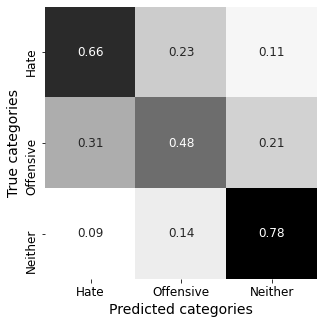

In [38]:
import numpy as np
import seaborn
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='gist_gray_r',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)
